# Homework set 5

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 4, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0


Guoda Paulauskaite 12255076 & Chayenne Olumuyiwa 12055662

# Exercise 1 (6 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [93]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14] )

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$. Implement the Gauss-Newton method yourself. You may use linear algebra functions from `scipy` and `numpy`. Plot the datapoints and the curve fitted to the data in a semilogarithmic plot.

It is best if you define your function for Gauss-Newton separately from the definitions associated with the bacterial model.

In [79]:
def Jacobian(x1, x2):
    '''Computes the Jacobian matrix for f = x1*x2^t for 8 data points.'''
    
    #preallocate array
    J = np.zeros((8, 2))
    
    for t in range(0, 8):
        J[t, 0] = -(x2**t)
        J[t, 1] = -t*x1*(x2**(t-1))
        
    return J

def Gauss_Newton(x_0, data, k):
    ""
    
    ""
    x = x_0
    n = len(data)
    t = list(range(1, n + 1))
    
    for j in range (k):
        x1 = x[0]
        x2 = x[1]
        y_approx = []

        for i in range(n):
            y = x1 * (x2**t[i])
            y_approx.append(y)

        residual = data - np.array(y_approx)
        J = Jacobian(x1, x2)
        sk = np.linalg.lstsq(J, residual,rcond=None)[0]

        x += sk
    return x

[-1.0311650317737548e+16, -4.2274518617126513e+18, -1.7331221184213764e+21, -7.105254833450705e+23, -2.9129306995550216e+26, -1.1942098431801412e+29, -4.895884237020104e+31, -2.0071583398166825e+34]


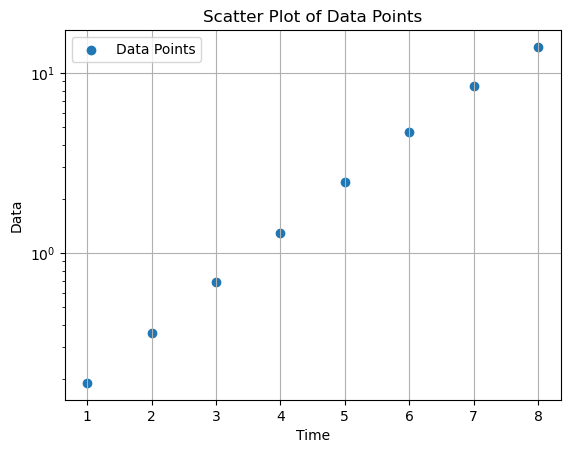

In [103]:
#Visualization/testing

x_0 =[1, 1]
data = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14])
k = 40
x = Gauss_Newton(x_0, data, k)

x1 = x[0]
x2 = x[1]
y_approx = []

for i in range(n):
    y = x1 * (x2**t[i])
    y_approx.append(y)

print(y_approx)

# Creating time points (assuming these are time points from 1 to 8)
time_points = np.arange(1, 9)

# Plotting the data points
plt.scatter(time_points, data, label='Data Points')
#plt.scatter(time_points, y_approx, label='approx')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Scatter Plot of Data Points')
plt.legend()
plt.yscale('log') 
plt.grid(True)
plt.show()

In [ ]:
# make definitions for bacterial model and run Gauss-Newton here


# (b)
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( y_i - f_i(x)) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| Y - F(x) \|_2^2
$$
with $F_i(x) = \frac{1}{\sigma_i} f(x)$  , $Y_i = \frac{1}{\sigma_i} y_i$. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0$ and $r$. 

Plot the datapoints and the curve fitted to the data again in a semilogarithmic plot.

Compare the residuals, i.e. the values of $y_i - f_i(x)$) obtained in (a) and (b), and discuss the differences between the results of the weighted and the unweighted optimization.


In [ ]:
# your code here

# Exercise 2 (3 points)
A triangle has been measured. The measurements, a vector $x \in \mathbb{R}^6$, are as follows:
$$\begin{array}{c|c|c|c|c|c}
x_1 = \alpha 
& x_2 = \beta
& x_3 = \gamma
& x_4 = a
& x_5 = b
& x_6 = c \\ \hline
67.5^{\large\circ}
& 52^{\large\circ}
& 60^{\large\circ}
& 172 \text{m}
& 146 \text{m}
& 165 \text{m}
\end{array} .
$$
Here $\alpha, \beta, \gamma$ are the angles opposite the sides with length $a$, $b$, $c$, respectively.
The measurements $x$ have errors. We would like to correct them so that the new values $\tilde{x} = x + h$ are consistent quantities of a triangle. The have to satisfy:
$$ \tag{*}
\begin{array}{ccc}
\text{Sum of angles:} 
& \;\;\;\;\; & 
\tilde{x}_1 + \tilde{x}_2 + \tilde{x}_3 = 180^{\large\circ}
\\
\text{Sine theorem:}
&&
\tilde{x}_4 \sin(\tilde{x}_2) - \tilde{x}_5 \sin(\tilde{x}_1) = 0
\\
&&
\tilde{x}_5 \sin(\tilde{x}_3) - \tilde{x}_6 \sin(\tilde{x}_2) = 0 .
\end{array}$$


## (a)
Solve the constrained least squares problem $\min_x \| h \|_2^2$ subject to the constraints given by (*).

Use `scipy.optimize.minimize`.

Hint: Don't forget to work in radians!

Check that for the new values also e.g. the cosine theorem $c^2 = a^2 + b^2 - 2 ab \cos(\gamma)$ holds.

## (b)
You will notice that the corrections will be made mainly to the angles and much less to the lengths of the sides of the triangle. This is because the measurements have not the same absolute errors. While the error in last digit of the sides is about 1, the errors in radians of the angles are about 0.01. Repeat your computation by taking in account with appropriate weighting the difference in measurement errors. Minimize not simply $\| h \|_2^2$ but
$$
  \left\| \begin{bmatrix} 100 h_1 \\ 100 h_2 \\ 100 h_3 \\ h_4 \\ h_5 \\ h_6 \end{bmatrix} \right\|_2^2.$$